Fig1u.re Q3(b) shows a shaft loaded with pulleys C and D, supported by bearings A and
B. The shaft transmits 70 kW of power at 1500 rpm to both pulleys. The diameters of
pulleys C and Dare 150 mm and 100 mm, respectively. Meanwhile, the belt tension
ratfos for pulley C and D are 2:1 and 3:2, respectively. The high-strength steel with a
yield stress of Sy::; 345 MPa is used for the shafl, with a safety factor of 2.5

i) Determ ine the belt tension on pulley C and D.

ii) Determ ine the diameter of using maximum shear stress theory of failure.

iii) If the material of the shaft changes to 600 MPa of the yield stress, suggest the
new diameter of the shaft.

In [173]:
from math import pi, sin, cos, sqrt, pow, radians, degrees, hypot
import matplotlib.pyplot as plt
import numpy as np

In [174]:
Power = 70000
nA = 1500
rC=0.075
rD = 0.05
Sy=345E+6
fos=2.5

$$P=\frac{2\pi n}{60} T$$

In [175]:
TorqueC = round(Power*60/(2*pi*nA),2)
print(f'Torque = {TorqueC} Nm')

Torque = 445.63 Nm


$$T=(F_1-F_2)r$$
$$F_1=2F_2$$
$$T=(2F_2-F_2)r$$
$$T=(F_2)r$$

In [176]:
F2=round(TorqueC/rC,2)
print(f'F2 = {F2} N')
F1=2*F2
print(f'F1 = {F1} N')

F2 = 5941.73 N
F1 = 11883.46 N


$$T=(F_3-F_4)r$$
$$F_3=\frac{3}{2}F_4$$
$$T=(1.5F4-F_4)r$$
$$T=(0.5F4)r$$

In [177]:
F4=round(TorqueC/(rD*0.5),2)
print(f'F4 = {F4} N')
F3=round(1.5*F4,2)
print(f'F3 = {F3} N')

F4 = 17825.2 N
F3 = 26737.8 N


In [178]:
Fc=F1+F2
Fd=F3+F4
print(f'Fc = {Fc} N')
print(f'Fd = {Fd} N')

Fc = 17825.19 N
Fd = 44563.0 N


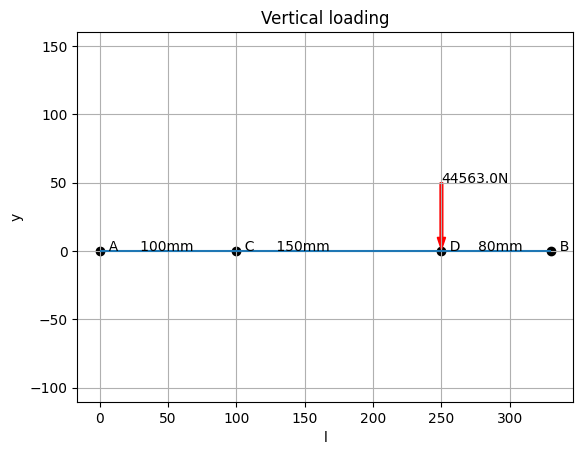

In [179]:
# Vertical Loading

coorA = [0,0]
coorB = [330,0]
coorC = [100,0]
coorD = [250,0]
loadLocation = [250,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T

fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=2,color='r')
ax.hlines(0,0,330)

ax.set(xlabel='l', ylabel='y',
       title='Vertical loading')

ax.text(loadLocation[0],loadLocation[1]+50,f'{Fd}N')
ax.text(coorA[0],coorA[1],f'  A     100mm')
ax.text(coorB[0],coorB[1],f'  B')
ax.text(coorC[0],coorC[1],f'  C     150mm')
ax.text(coorD[0],coorD[1],f'  D    80mm')

plt.axis('equal')
plt.show()

Calculate reaction force at A and B

$$+\uparrow \sum F_x=0$$
$$A_x+B_x-22281.5=0$$

$$+\circlearrowleft \sum M_b=0$$
$$-A_x(330)+22281.5(80)=0$$
$$A_x=22281.5(80)/330$$

In [180]:
ab = 330
db = 80
Ay=round(Fd*db/ab,2)
print(f'Ay = {Ay} N')

Ay = 10803.15 N


In [181]:
By = Fd-Ay
print(f'By = {By} N')

By = 33759.85 N


In [182]:
Cy=Fd

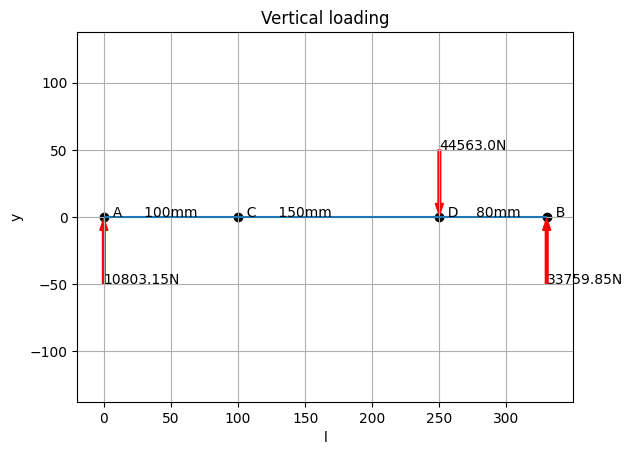

In [183]:
# Vertical Loading

coorA = [0,0]
coorB = [330,0]
coorC = [100,0]
coorD = [250,0]
loadLocation = [250,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T

fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=2,color='r')
ax.arrow(coorA[0],coorA[1]-50,0,40,width=2,color='r')
ax.arrow(coorB[0],coorB[1]-50, 0,40 ,width=2,color='r')
ax.hlines(0,0,330)

ax.set(xlabel='l', ylabel='y',
       title='Vertical loading')

ax.text(loadLocation[0],loadLocation[1]+50,f'{Fd}N')
ax.text(coorA[0],coorA[1]-50,f'{Ay}N')
ax.text(coorB[0],coorB[1]-50,f'{By}N')
ax.text(coorA[0],coorA[1],f'  A     100mm')
ax.text(coorB[0],coorB[1],f'  B')
ax.text(coorC[0],coorC[1],f'  C     150mm')
ax.text(coorD[0],coorD[1],f'  D    80mm')

plt.axis('equal')
plt.show()

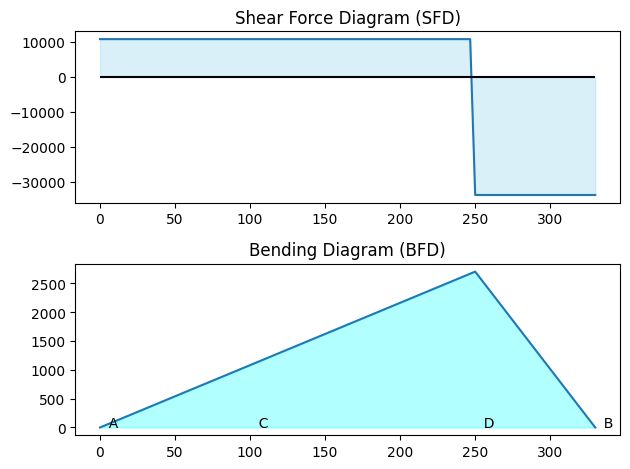

In [184]:
ac=loadLocation[0]
y = np.linspace(0,ab,100)
V = np.zeros_like(y)
for i, xi in enumerate(y):
    if xi < ac:
        V[i] = Ay
    else:
        V[i] = Ay - Cy

M = np.zeros_like(y) # Create Moment for each distance
for i, xi in enumerate(y):
    if xi <= ac:
        M[i] = Ay * xi/1000
    else:
        M[i] = Ay * xi/1000 - Cy * (xi - ac)/1000


fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(y,V)
ax1.hlines(0,0,330,colors='black')
ax1.fill_between(y, V,color='skyblue', alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')

ax2.plot(y,M)
ax2.fill_between(y, M,color='cyan', alpha=0.3) # Added fill_between
ax2.set_title('Bending Diagram (BFD)')

ax2.text(coorA[0],coorA[1],f'  A')
ax2.text(coorB[0],coorB[1],f'  B')
ax2.text(coorC[0],coorC[1],f'  C')
ax2.text(coorD[0],coorD[1],f'  D')

plt.tight_layout()
plt.show()

In [185]:
ac=0.1
Mcy = round(Ay*ac,2)
print(f'Mcy={Mcy} Nm')

db=0.08
Mdy = round(By*db,2)
print(f'Mdy={Mdy} Nm')

Mcy=1080.32 Nm
Mdy=2700.79 Nm


Horizontal loading

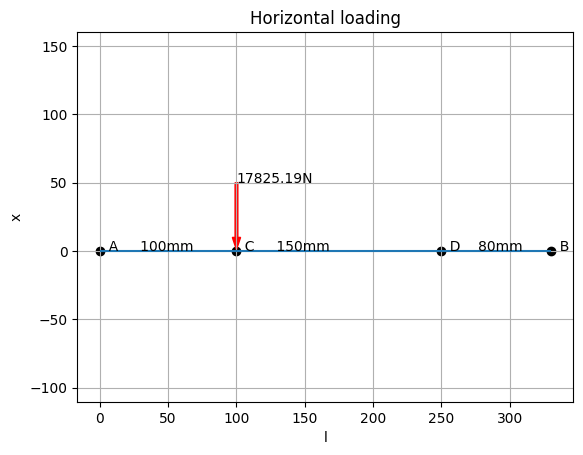

In [186]:
# Horizontal Loading

coorA = [0,0]
coorB = [330,0]
coorC = [100,0]
coorD = [250,0]
loadLocation = [100,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=2,color='r')
ax.hlines(0,0,330)

ax.set(xlabel='l', ylabel='x',
       title='Horizontal loading')

ax.text(loadLocation[0],loadLocation[1]+50,f'{Fc}N')
ax.text(coorA[0],coorA[1],f'  A     100mm')
ax.text(coorB[0],coorB[1],f'  B')
ax.text(coorC[0],coorC[1],f'  C     150mm')
ax.text(coorD[0],coorD[1],f'  D    80mm')

plt.axis('equal')
plt.show()

$$+\uparrow \sum F_y=0$$
$$A_y+B_y-17825.19=0$$

$$+\circlearrowleft \sum M_b=0$$
$$-A_y(330)+17825.19(230)=0$$
$$A_y=17825.19(230)/330$$

In [187]:
ab = 330
cb = 230
Ax=round(Fc*cb/ab,2)
print(f'Ax = {Ax} N')

Ax = 12423.62 N


In [188]:
Bx = round(Fc-Ax,2)
print(f'Bx = {Bx} N')

Bx = 5401.57 N


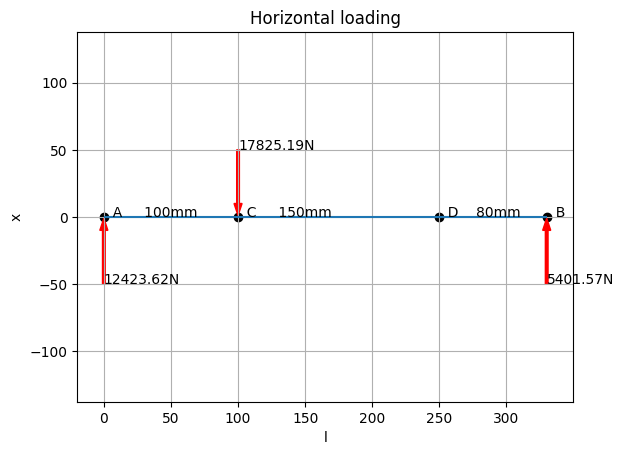

In [189]:
# Horizontal Loading

coorA = [0,0]
coorB = [330,0]
coorC = [100,0]
coorD = [250,0]
loadLocation = [100,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=2,color='r')
ax.arrow(coorA[0],coorA[1]-50,0,40,width=2,color='r')
ax.arrow(coorB[0],coorB[1]-50, 0,40 ,width=2,color='r')
ax.hlines(0,0,330)

ax.set(xlabel='l', ylabel='x',
       title='Horizontal loading')

ax.text(loadLocation[0],loadLocation[1]+50,f'{Fc}N')
ax.text(coorA[0],coorA[1]-50,f'{Ax}N')
ax.text(coorB[0],coorB[1]-50,f'{Bx}N')
ax.text(coorA[0],coorA[1],f'  A     100mm')
ax.text(coorB[0],coorB[1],f'  B')
ax.text(coorC[0],coorC[1],f'  C     150mm')
ax.text(coorD[0],coorD[1],f'  D    80mm')

plt.axis('equal')
plt.show()

In [197]:
ac=0.1
Mcx = round(Ax*ac,2)
print(f'Mcx={Mcx} Nm')

Mcx=1242.36 Nm


In [205]:
db=0.08
Mdx = round(Bx*db,2)
print(f'Mdx={Mdx} Nm')

Mdx=432.13 Nm


In [199]:
Atotal = round(hypot(Ax,Ay),2)
Btotal = round(hypot(Bx,By),2)
print(f'A = {Atotal} N')
print(f'B = {Btotal} N')
print('This resultant for A and B for bearing. Not for shaft')

A = 16463.73 N
B = 34189.24 N
This resultant for A and B for bearing. Not for shaft


In [206]:
Mc = round(hypot(Mcx,Mcy),2)
Md = round(hypot(Mdx,Mdy),2)
print(f'Ma=0 Nm')
print(f'Mb=0 Nm')
print(f'Mc={Mc} Nm')
print(f'Md={Md} Nm')

Ma=0 Nm
Mb=0 Nm
Mc=1646.37 Nm
Md=2735.14 Nm


In [201]:
print('Critical point at D')
Mmax = Md

Critical point at D


In [202]:
Dmss = round(pow(32*fos*hypot(Mmax,TorqueC)/(Sy*pi),1/3),5)
print(f'Diameter = {Dmss}m')
print(f'Diameter = {Dmss*1000}mm')

Diameter = 0.05892m
Diameter = 58.92mm


In [203]:
Sy_new = 600E+6
Dmss = round(pow(32*fos*hypot(Mmax,TorqueC)/(Sy_new*pi),1/3),5)
print(f'Diameter = {Dmss}m')
print(f'Diameter = {Dmss*1000}mm')

Diameter = 0.049m
Diameter = 49.0mm
